In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


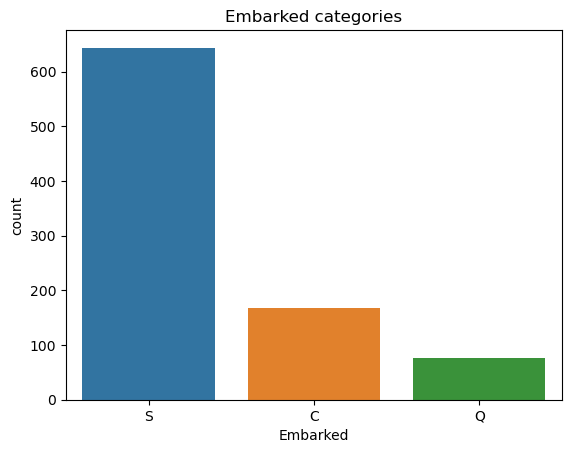

In [6]:
sns.countplot(x='Embarked',data=data)
plt.title('Embarked categories')
plt.show()

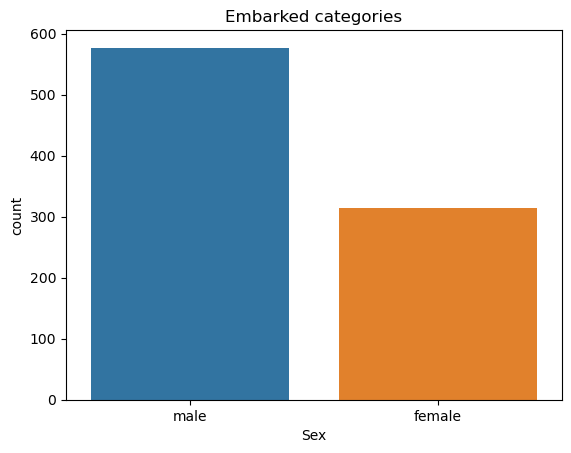

In [7]:
sns.countplot(x='Sex',data=data)
plt.title('Embarked categories')
plt.show()

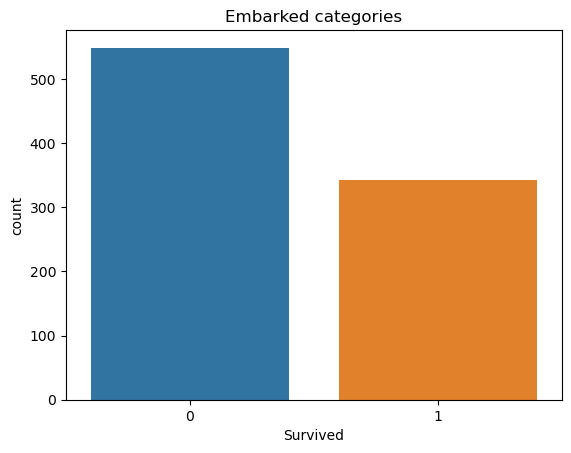

In [8]:
sns.countplot(x='Survived',data=data)
plt.title('Embarked categories')
plt.show()

In [9]:
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
data.drop(['Name'], axis = 1, inplace = True)

In [12]:
data['Ticket'].values.reshape(-1, 1)

array([['A/5 21171'],
       ['PC 17599'],
       ['STON/O2. 3101282'],
       ['113803'],
       ['373450'],
       ['330877'],
       ['17463'],
       ['349909'],
       ['347742'],
       ['237736'],
       ['PP 9549'],
       ['113783'],
       ['A/5. 2151'],
       ['347082'],
       ['350406'],
       ['248706'],
       ['382652'],
       ['244373'],
       ['345763'],
       ['2649'],
       ['239865'],
       ['248698'],
       ['330923'],
       ['113788'],
       ['349909'],
       ['347077'],
       ['2631'],
       ['19950'],
       ['330959'],
       ['349216'],
       ['PC 17601'],
       ['PC 17569'],
       ['335677'],
       ['C.A. 24579'],
       ['PC 17604'],
       ['113789'],
       ['2677'],
       ['A./5. 2152'],
       ['345764'],
       ['2651'],
       ['7546'],
       ['11668'],
       ['349253'],
       ['SC/Paris 2123'],
       ['330958'],
       ['S.C./A.4. 23567'],
       ['370371'],
       ['14311'],
       ['2662'],
       ['349237'],
       ['3101295'

In [13]:
data['Cabin'].values.reshape(-1,1)

array([[nan],
       ['C85'],
       [nan],
       ['C123'],
       [nan],
       [nan],
       ['E46'],
       [nan],
       [nan],
       [nan],
       ['G6'],
       ['C103'],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       ['D56'],
       [nan],
       ['A6'],
       [nan],
       [nan],
       [nan],
       ['C23 C25 C27'],
       [nan],
       [nan],
       [nan],
       ['B78'],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       ['D33'],
       [nan],
       ['B30'],
       ['C52'],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       ['B28'],
       ['C83'],
       [nan],
       [nan],
       [nan],
       ['F33'],
       [nan],
       [na

In [14]:

data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S


In [15]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
data.replace({"Embarked":{'S':0,'C':1,'Q':2}}, inplace=True)

In [17]:
data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,0.0


In [18]:
data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
data.replace({'Sex':{'male':0,'female':1}}, inplace=True)

In [20]:
data.drop(['Ticket'], axis = 1, inplace= True)

In [21]:
data.drop(['Cabin'], axis = 1, inplace=True)

In [22]:
data.fillna(0, inplace=True)

In [23]:
X = data.drop(['Survived'],axis = 1)
y = data['Survived']

In [24]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = knn.predict(X_test)

In [30]:
knn_r2 = r2_score(y_test, y_pred)
print(f'The r2 score of the test is:{knn_r2}')

The r2 score of the test is:0.1936936936936937


# Cross Validation score

In [31]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range(1,31)]
scores=[]
scaler = StandardScaler()
X = scaler.fit_transform(X)
for k in k_values:
    knn= KNeighborsClassifier(n_neighbors=k)
    score =cross_val_score(knn,X,y,cv=5)
    scores.append(np.mean(score))

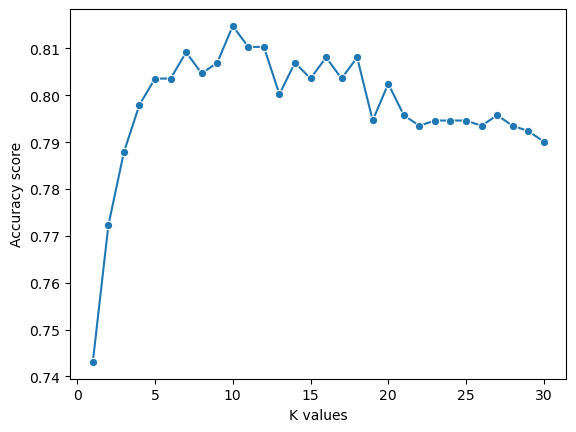

In [32]:
sns.lineplot(x=k_values, y= scores, marker='o')
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.show()

In [33]:
data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.25,0.0


# New predicted value

In [34]:
new_value=[[1,3,0,22.0,1,0,7.25,0.0]]

In [35]:
new_value = scaler.transform(new_value)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
prediction = knn.predict(new_value)
print(f'The preedicted survived value is :{prediction}')

The preedicted survived value is :[0]
